# Using Alphavantage 
Alpha Vantage provides realtime and historical financial market data through a set of powerful 
and developer-friendly data APIs



In [ ]:
#  %pip install alpha_vantage   # comment after installing alpha_van

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange

In [2]:
#  Claim your free API key from https://alphavantage.co
# 
mykey = 'ZT5AY7RGJ5GZYJP3'

### 2. Get Real-Time Currency Exchange Rates



In [3]:
fx = ForeignExchange(mykey)
# Get EUR/USD exchange rate
data1= fx.get_currency_exchange_rate(from_currency="EUR", to_currency="USD")
print(data1)

({'1. From_Currency Code': 'EUR', '2. From_Currency Name': 'Euro', '3. To_Currency Code': 'USD', '4. To_Currency Name': 'United States Dollar', '5. Exchange Rate': '1.08150000', '6. Last Refreshed': '2025-03-31 17:18:31', '7. Time Zone': 'UTC', '8. Bid Price': '1.08145000', '9. Ask Price': '1.08150000'}, None)


In [4]:
for key, value in data1[0].items():
    #label = key.split('. ', 1)[1]
    print(f"{key}: {value.lstrip()}")

1. From_Currency Code: EUR
2. From_Currency Name: Euro
3. To_Currency Code: USD
4. To_Currency Name: United States Dollar
5. Exchange Rate: 1.08150000
6. Last Refreshed: 2025-03-31 17:18:31
7. Time Zone: UTC
8. Bid Price: 1.08145000
9. Ask Price: 1.08150000


In [5]:
data1= fx.get_currency_exchange_rate(from_currency="BTC", to_currency="USD")
print(data1)

({'1. From_Currency Code': 'BTC', '2. From_Currency Name': 'Bitcoin', '3. To_Currency Code': 'USD', '4. To_Currency Name': 'United States Dollar', '5. Exchange Rate': '83501.19000000', '6. Last Refreshed': '2025-03-31 17:19:03', '7. Time Zone': 'UTC', '8. Bid Price': '83500.63800000', '9. Ask Price': '83502.15400000'}, None)


In [6]:
for key, value in data1[0].items():
    print(f"{key}: {value.lstrip()}")

1. From_Currency Code: BTC
2. From_Currency Name: Bitcoin
3. To_Currency Code: USD
4. To_Currency Name: United States Dollar
5. Exchange Rate: 83501.19000000
6. Last Refreshed: 2025-03-31 17:19:03
7. Time Zone: UTC
8. Bid Price: 83500.63800000
9. Ask Price: 83502.15400000


### 3. Get Intraday Stock Prices (Real-Time)

In [7]:
ts = TimeSeries(mykey, output_format='pandas')

data, meta = ts.get_intraday('TSLA', interval='60min', outputsize='full') # Get real-time intraday stock data (60 minutes intervals

In [8]:
type(ts)

alpha_vantage.timeseries.TimeSeries

In [9]:
meta

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2025-03-28 19:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 349 entries, 2025-03-28 19:00:00 to 2025-02-27 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    349 non-null    float64
 1   2. high    349 non-null    float64
 2   3. low     349 non-null    float64
 3   4. close   349 non-null    float64
 4   5. volume  349 non-null    float64
dtypes: float64(5)
memory usage: 16.4 KB


In [12]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-28 19:00:00,261.174,261.1740,260.0000,260.12,392417.0
2025-03-28 18:00:00,261.910,263.5500,260.8100,261.00,245878.0
2025-03-28 17:00:00,262.070,269.4952,245.8456,261.86,371627.0
2025-03-28 16:00:00,263.480,274.4579,244.1347,262.01,11396886.0
2025-03-28 15:00:00,263.955,264.8346,260.5700,263.54,17088707.0


In [13]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-02-27 08:00:00,297.26,308.175,286.40,294.54,1802557.0
2025-02-27 07:00:00,295.92,297.850,295.30,297.35,746927.0
2025-02-27 06:00:00,295.80,296.570,295.25,295.98,228383.0
2025-02-27 05:00:00,295.18,296.290,293.99,295.80,263437.0
2025-02-27 04:00:00,290.78,295.920,289.22,295.18,576198.0


In [14]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [15]:
data

,open,high,low,close,volume
date,,,,,
2025-03-28 19:00:00,261.174,261.1740,260.0000,260.12,392417.0
2025-03-28 18:00:00,261.910,263.5500,260.8100,261.00,245878.0
2025-03-28 17:00:00,262.070,269.4952,245.8456,261.86,371627.0
2025-03-28 16:00:00,263.480,274.4579,244.1347,262.01,11396886.0
2025-03-28 15:00:00,263.955,264.8346,260.5700,263.54,17088707.0
...,...,...,...,...,...
2025-02-27 08:00:00,297.260,308.1750,286.4000,294.54,1802557.0
2025-02-27 07:00:00,295.920,297.8500,295.3000,297.35,746927.0
2025-02-27 06:00:00,295.800,296.5700,295.2500,295.98,228383.0


### 4. Plotting

In [16]:
import plotly.graph_objects as go

In [17]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'], high=data['high'],
                low=data['low'], close=data['close'])])

fig.update_layout(title="TESLA Candlestick Chart")
fig.show()

### Install plfinance 
    Utilities for the visualization, and visual analysis, of financial data

In [ ]:
# %pip install --upgrade mplfinance

In [18]:
import mplfinance as mpf

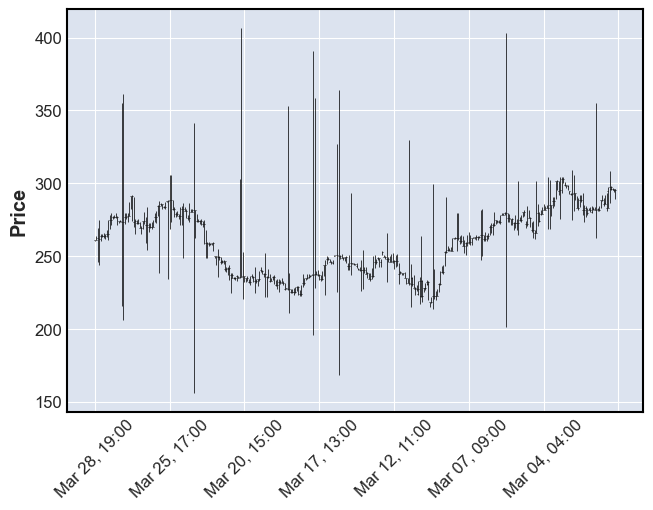

In [19]:
mpf.plot(data)

In [20]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2025-02-27 10:00:00 to 2025-03-28 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    154 non-null    float64
 1   high    154 non-null    float64
 2   low     154 non-null    float64
 3   close   154 non-null    float64
 4   volume  154 non-null    float64
dtypes: float64(5)
memory usage: 7.2 KB


In [22]:
market.groupby('date').agg({'low':min, 'high':max})

C:\Users\DELL\AppData\Local\Temp\ipykernel_19084\3833834504.py:1: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19084\3833834504.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,low,high
date,,
2025-02-27 10:00:00,280.8800,293.5200
2025-02-27 11:00:00,285.4100,292.0000
2025-02-27 12:00:00,284.3300,289.8300
2025-02-27 13:00:00,287.9600,291.8244
2025-02-27 14:00:00,282.9600,288.7299
...,...,...
2025-03-28 12:00:00,261.7500,265.0999
2025-03-28 13:00:00,262.3600,266.0000
2025-03-28 14:00:00,262.7700,265.4000


In [23]:
market.loc[market.groupby('date')['low'].idxmin()]

,open,high,low,close,volume
date,,,,,
2025-02-27 10:00:00,283.0400,293.5200,280.8800,286.4604,21302791.0
2025-02-27 11:00:00,286.6400,292.0000,285.4100,285.6600,10219337.0
2025-02-27 12:00:00,285.7400,289.8300,284.3300,289.5350,9342902.0
2025-02-27 13:00:00,289.5864,291.8244,287.9600,288.5289,8788421.0
2025-02-27 14:00:00,288.5250,288.7299,282.9600,284.7206,9277176.0
...,...,...,...,...,...
2025-03-28 12:00:00,263.4292,265.0999,261.7500,263.6200,11019109.0
2025-03-28 13:00:00,263.5400,266.0000,262.3600,263.4450,10194188.0
2025-03-28 14:00:00,263.4100,265.4000,262.7700,263.9550,10160001.0


In [24]:
market.loc[market.groupby('date')['high'].idxmax()]

,open,high,low,close,volume
date,,,,,
2025-02-27 10:00:00,283.0400,293.5200,280.8800,286.4604,21302791.0
2025-02-27 11:00:00,286.6400,292.0000,285.4100,285.6600,10219337.0
2025-02-27 12:00:00,285.7400,289.8300,284.3300,289.5350,9342902.0
2025-02-27 13:00:00,289.5864,291.8244,287.9600,288.5289,8788421.0
2025-02-27 14:00:00,288.5250,288.7299,282.9600,284.7206,9277176.0
...,...,...,...,...,...
2025-03-28 12:00:00,263.4292,265.0999,261.7500,263.6200,11019109.0
2025-03-28 13:00:00,263.5400,266.0000,262.3600,263.4450,10194188.0
2025-03-28 14:00:00,263.4100,265.4000,262.7700,263.9550,10160001.0
